# 지도 학습 - Classification

In [1]:
# 필요한 라이브러리 로드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc, cm
import matplotlib as mpl

# 마이너스 깨짐 현상 해결하기
mpl.rcParams['axes.unicode_minus'] = False
# 한글 폰트 지정
plt.rcParams['font.family'] = 'NanumGothic'

## 데이터 준비

In [79]:
## titanic 데이터 ##
# 파일 경로 설정
file_path = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

# csv를 DF로 가져오기
raw = pd.read_csv(file_path, index_col=0)

In [80]:
titanic = raw.copy()
print(titanic.shape)
titanic.head(2)

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [81]:
# 컬럼별 정보 확인
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [82]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

**결측치**
1. Age : 177 (애매하게 결측치가 있어서 대체를 해줘야 할 듯 함.)
2. Cabin : 687 (결측치가 가장 많음. 필요하지 않은 데이터이면 삭제해도 괜찮을 것 같음.)
3. Embarked : 2 ==> 최빈값으로 대체해줘도 괜찮을 것 같음.

In [83]:
# 요약 통계량 확인
titanic.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 데이터 처리

### Cabin

In [84]:
titanic.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

결측치가 너무 많아 삭제

In [85]:
# EDA용 DF를 만든다.
titanic_eda = titanic.drop(columns='Cabin')

print(titanic_eda.shape)
titanic_eda.head(2)

(891, 10)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


### Embarked

In [86]:
# 빈도수 확인
titanic_eda.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

S : 가장 많이 존재 >> 이걸로 결측치를 대체할 것임.

In [87]:
# 최빈값으로 결측치 대체하기
titanic_eda['Embarked'] = titanic_eda.Embarked.fillna('S')
titanic_eda.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

### AGE

In [88]:
# age의 요약 통계량 확인
titanic_eda.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

0 ~ 80세까지 존재

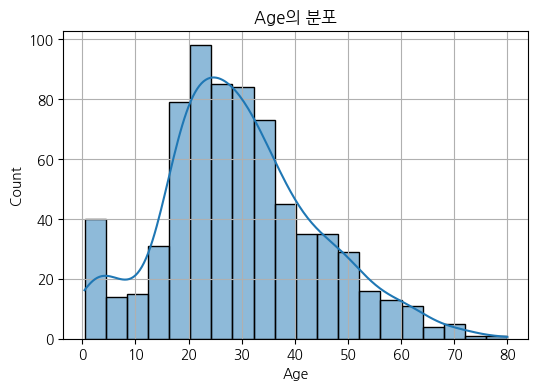

In [90]:
# age의 히스토그램 확인
plt.figure(figsize=(6, 4))
sns.histplot(data=titanic_eda.dropna().Age, kde=True)

plt.title('Age의 분포')

plt.grid()
plt.show()

1. 평균으로 대체할지, 중앙값으로 대체할지 생각해볼 필요가 있음.
2. AGE가 결측치가 아닌 데이터 확인하기
    * 다른 데이터와 age와의 관계 확인

In [91]:
# age가 notnull인 DF
titanic_eda_notnull = titanic_eda[titanic_eda.Age.notnull()]
print(titanic_eda_notnull.shape)
titanic_eda_notnull.head(2)

(714, 10)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [92]:
titanic_eda_notnull.Age.value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

20, 30, 40대.. 이렇게 나타내도 좋을 것 같다.

In [93]:
# 범주형 데이터로 바꾸기
# 컬럼명 : Age_range
def age_range(n):
    if n >= 80:
        return 8
    elif n >= 70:
        return 7
    elif n >= 60:
        return 6
    elif n >= 50:
        return 5
    elif n >= 40:
        return 4
    elif n >= 30:
        return 3
    elif n >= 20:
        return 2
    elif n >= 10:
        return 1
    else:
        return 0

# 새로운 컬럼 만들기
titanic_eda_notnull['Age_range'] = titanic_eda_notnull.Age.apply(age_range)

# Age 컬럼은 drop하기 - 일단 삭제하지 않을 것
# titanic_eda_notnull = titanic_eda_notnull.drop(columns='Age')

titanic_eda_notnull.isnull().sum()

C:\Users\tjdtn\AppData\Local\Temp\ipykernel_15652\360184332.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_eda_notnull['Age_range'] = titanic_eda_notnull.Age.apply(age_range)


Survived     0
Pclass       0
Name         0
Sex          0
Age          0
SibSp        0
Parch        0
Ticket       0
Fare         0
Embarked     0
Age_range    0
dtype: int64

결측치가 없는 것으로 확인해도 좋을 것 같음.
* Age 결측치 DF를 test 데이터로 써도 좋을 것 같다. 연령대 예측하는 회귀 모델 만들기로 !

이제는 다른 데이터도 확인해보자 !

### Ticket

In [95]:
titanic_eda_notnull.Ticket # 티겟 넘버 ==> 예측에 필요없다고 판단 (제거 해도 될 것 같다 !)

PassengerId
1             A/5 21171
2              PC 17599
3      STON/O2. 3101282
4                113803
5                373450
             ...       
886              382652
887              211536
888              112053
890              111369
891              370376
Name: Ticket, Length: 714, dtype: object

### Name

In [96]:
titanic_eda_notnull.Name # 이름과 성별 확인하기
# 'Name' 컬럼은 상관없을 것 같다. >> 삭제

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
886                 Rice, Mrs. William (Margaret Norton)
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 714, dtype: object

In [56]:
# 이름의 중간 단어가 성별을 나타내는 것이다. >> 'Sex'와 비교해보아도 좋을 듯함.
# titanic_eda_notnull['Name_sex'] = titanic_eda_notnull.Name.apply(lambda x : x.split(' ')[1].strip('.'))

### SibSp / Parch
* Sibsp : 형제자매 + 배우자
* Parch : 부모 + 자식
* ==> 동승자 처리 해주기 (더해서 0이면 동승자 없)

In [98]:
titanic_eda_notnull['Together_num'] = titanic_eda_notnull.SibSp + titanic_eda_notnull.Parch
titanic_eda_notnull.head(2)

C:\Users\tjdtn\AppData\Local\Temp\ipykernel_15652\3202366335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_eda_notnull['Together_num'] = titanic_eda_notnull.SibSp + titanic_eda_notnull.Parch


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_range,Together,Together_num
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,1,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3,1,1


In [100]:
# 동승자 있나(1) 없나(0) 처리
titanic_eda_notnull['Together'] = titanic_eda_notnull.Together_num.apply(lambda x : 0 if x == 0 else 1)
titanic_eda_notnull.head(2)

C:\Users\tjdtn\AppData\Local\Temp\ipykernel_15652\1556010720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_eda_notnull['Together'] = titanic_eda_notnull.Together_num.apply(lambda x : 0 if x == 0 else 1)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_range,Together,Together_num
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,1,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3,1,1


### Fare

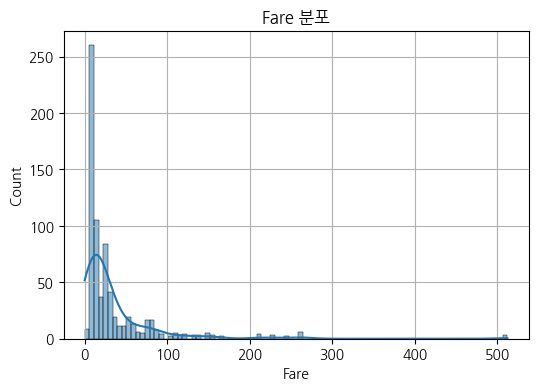

In [101]:
# 히스토그램으로 분포 확인
plt.figure(figsize=(6, 4))
sns.histplot(data=titanic_eda_notnull.Fare, kde=True)
plt.title('Fare 분포')
plt.grid()
plt.show()

스케일링 필요함.

In [67]:
titanic_eda_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 1 to 891
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   714 non-null    int64  
 1   Pclass     714 non-null    int64  
 2   Name       714 non-null    object 
 3   Sex        714 non-null    object 
 4   SibSp      714 non-null    int64  
 5   Parch      714 non-null    int64  
 6   Ticket     714 non-null    object 
 7   Fare       714 non-null    float64
 8   Embarked   714 non-null    object 
 9   Age_range  714 non-null    int64  
 10  Together   714 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 83.1+ KB


In [102]:
# 삭제할 컬럼 삭제하기
titanic_eda_notnull = titanic_eda_notnull.drop(columns=['Name', 'Ticket'])
titanic_eda_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 1 to 891
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      714 non-null    int64  
 1   Pclass        714 non-null    int64  
 2   Sex           714 non-null    object 
 3   Age           714 non-null    float64
 4   SibSp         714 non-null    int64  
 5   Parch         714 non-null    int64  
 6   Fare          714 non-null    float64
 7   Embarked      714 non-null    object 
 8   Age_range     714 non-null    int64  
 9   Together      714 non-null    int64  
 10  Together_num  714 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 66.9+ KB


In [103]:
# Fare 스케일링하기 >> Standardscaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
titanic_eda_notnull[['Fare_scaled']] = scaler.fit_transform(titanic_eda_notnull[['Fare']])

In [104]:
titanic_eda_notnull.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Age_range', 'Together', 'Together_num', 'Fare_scaled'],
      dtype='object')

### Sex, Embarked
* 라벨인코딩

In [105]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

titanic_eda_notnull['Sex_label'] = encoder.fit_transform(titanic_eda_notnull.Sex)
titanic_eda_notnull['Embarked_label'] = encoder.fit_transform(titanic_eda_notnull.Embarked)

In [163]:
# 원핫인코딩
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

# 희소행렬
onehot_Sex = encoder.fit_transform(titanic_eda_notnull[['Sex']])
# 밀집행렬로 바꾸어서 DF로 만들어주기
onehot_Sex_df = pd.DataFrame(data=onehot_Sex.todense(), columns=encoder.get_feature_names_out())

# 희소행렬
onehot_Embarked = encoder.fit_transform(titanic_eda_notnull[['Embarked']])
# 밀집행렬로 바꾸어서 DF로 만들어주기
onehot_Embarked_df = pd.DataFrame(data=onehot_Embarked.todense(), columns=encoder.get_feature_names_out())

# 'titanic_eda_notnull'에 추가
titanic_eda_notnull_final = pd.concat([titanic_eda_notnull.reset_index(drop=True), onehot_Sex_df, onehot_Embarked_df], axis=1)

In [164]:
titanic_eda_notnull_final.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Age_range', 'Together', 'Together_num', 'Fare_scaled',
       'Sex_label', 'Embarked_label', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

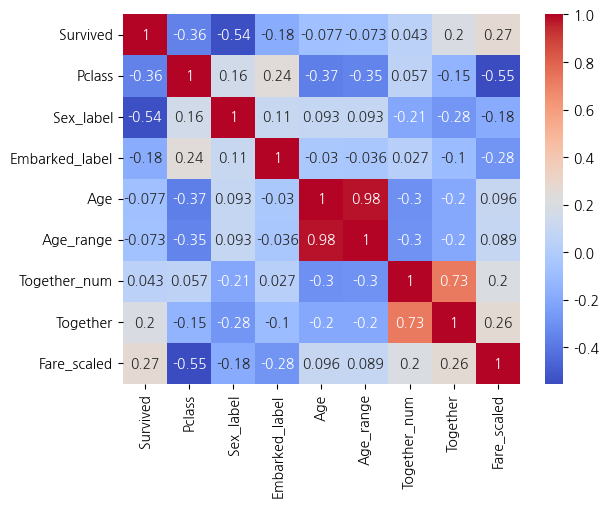

In [165]:
# 변수들간의 상관관계 분석
features = ['Survived', 'Pclass', 'Sex_label', 'Embarked_label', 'Age', 'Age_range', 'Together_num', 'Together', 'Fare_scaled']

sns.heatmap(data=titanic_eda_notnull_final[features].corr(), annot=True, cmap='coolwarm')
plt.show()

## 모델링
* 생존여부 예측하기 - 분류 분석

In [166]:
## 분석 데이터 준비
# 독립변수 - 라벨인코딩
X_label = titanic_eda_notnull_final[['Pclass', 'Sex_label', 'Embarked_label', 'Age_range', 'Together_num', 'Together', 'Fare_scaled']]
# 독립변수 - 원핫인코딩
X_onehot = titanic_eda_notnull_final[['Pclass', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Fare_scaled', 'Together', 'Age_range']]
# 종속변수
y = titanic_eda_notnull.Survived

# training / test data
from sklearn.model_selection import train_test_split
# 라벨인코딩
X_label_train, X_label_test, y_train, y_test = \
train_test_split(X_label, y, test_size=0.25, random_state=42)
# 원핫인코딩
X_onehot_train, X_onehot_test, y_train, y_test = \
train_test_split(X_onehot, y, test_size=0.25, random_state=42)

print(X_label_train.shape, y_train.shape, X_label_test.shape, y_test.shape)
print(X_onehot_train.shape, y_train.shape, X_onehot_test.shape, y_test.shape)

(535, 7) (535,) (179, 7) (179,)
(535, 9) (535,) (179, 9) (179,)


In [167]:
# 모델 생성 - 의사결정나무
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5,
                            random_state=42)
# 라벨인코딩
dt.fit(X_label_train, y_train)

y_train_pred = dt.predict(X_label_train)
y_test_pred = dt.predict(X_label_test)

# 성능 평가
# MAE, MSE, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

print('='*7, 'LabelEncoding', '='*7)
print('ACCURACY SCORE - TRAIN DATA\n>> {:.2f}%'.format(accuracy_score(y_train, y_train_pred)*100))
print('ACCURACY SCORE - TEST DATA\n>> {:.2f}%'.format(accuracy_score(y_test, y_test_pred)*100))
print('F1 SCORE : {:.4f}'.format(f1_score(y_test, y_test_pred)))
print(f'CONFUSION MATRIX\n{confusion_matrix(y_test, y_test_pred)}')
print(classification_report(y_test, y_test_pred))

# 원핫
dt.fit(X_onehot_train, y_train)

y_train_pred = dt.predict(X_onehot_train)
y_test_pred = dt.predict(X_onehot_test)

# 성능 평가
# MAE, MSE, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

print('='*7, 'OneHotEncoding', '='*7)
print('ACCURACY SCORE - TRAIN DATA\n>> {:.2f}%'.format(accuracy_score(y_train, y_train_pred)*100))
print('ACCURACY SCORE - TEST DATA\n>> {:.2f}%'.format(accuracy_score(y_test, y_test_pred)*100))
print('F1 SCORE : {:.4f}'.format(f1_score(y_test, y_test_pred)))
print(f'CONFUSION MATRIX\n{confusion_matrix(y_test, y_test_pred)}')
print(classification_report(y_test, y_test_pred))

======= LabelEncoding =======
ACCURACY SCORE - TRAIN DATA
>> 87.10%
ACCURACY SCORE - TEST DATA
>> 75.42%
F1 SCORE : 0.6812
CONFUSION MATRIX
[[88 19]
 [25 47]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       107
           1       0.71      0.65      0.68        72

    accuracy                           0.75       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179

======= OneHotEncoding =======
ACCURACY SCORE - TRAIN DATA
>> 87.10%
ACCURACY SCORE - TEST DATA
>> 75.98%
F1 SCORE : 0.6906
CONFUSION MATRIX
[[88 19]
 [24 48]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       107
           1       0.72      0.67      0.69        72

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.76      0.76       179



In [169]:
# 모델 생성 - 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200,
                            max_depth=5,
                            n_jobs=-1,
                            random_state=42)
# fitting - 라벨인코딩
rf.fit(X_label_train, y_train)

# predict
y_train_pred = rf.predict(X_label_train)
y_test_pred = rf.predict(X_label_test)

# 성능평가
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

print('='*7, 'LabelEncoding', '='*7)
print('ACCURACY SCORE - TRAIN DATA\n>> {:.2f}%'.format(accuracy_score(y_train, y_train_pred)*100))
print('ACCURACY SCORE - TEST DATA\n>> {:.2f}%'.format(accuracy_score(y_test, y_test_pred)*100))
print('F1 SCORE : {:.4f}'.format(f1_score(y_test, y_test_pred)))
print(f'CONFUSION MATRIX\n{confusion_matrix(y_test, y_test_pred)}')
print(classification_report(y_test, y_test_pred))

# fitting - 원핫인코딩
rf.fit(X_onehot_train, y_train)

# predict
y_train_pred = rf.predict(X_onehot_train)
y_test_pred = rf.predict(X_onehot_test)

# 성능평가
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

print('='*7, 'OneHotEncoding', '='*7)
print('ACCURACY SCORE - TRAIN DATA\n>> {:.2f}%'.format(accuracy_score(y_train, y_train_pred)*100))
print('ACCURACY SCORE - TEST DATA\n>> {:.2f}%'.format(accuracy_score(y_test, y_test_pred)*100))
print('F1 SCORE : {:.4f}'.format(f1_score(y_test, y_test_pred)))
print(f'CONFUSION MATRIX\n{confusion_matrix(y_test, y_test_pred)}')
print(classification_report(y_test, y_test_pred))

======= LabelEncoding =======
ACCURACY SCORE - TRAIN DATA
>> 87.66%
ACCURACY SCORE - TEST DATA
>> 82.68%
F1 SCORE : 0.7559
CONFUSION MATRIX
[[100   7]
 [ 24  48]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       107
           1       0.87      0.67      0.76        72

    accuracy                           0.83       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179

======= OneHotEncoding =======
ACCURACY SCORE - TRAIN DATA
>> 86.17%
ACCURACY SCORE - TEST DATA
>> 80.45%
F1 SCORE : 0.7328
CONFUSION MATRIX
[[96 11]
 [24 48]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       107
           1       0.81      0.67      0.73        72

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



In [170]:
# 모델 생성 - 서포트 벡터 머신
from sklearn.svm import SVC

svc = SVC(kernel='linear',
          random_state=42)

# fitting - 라벨인코딩
svc.fit(X_label_train, y_train)

# 예측
y_train_pred = svc.predict(X_label_train)
y_test_pred = svc.predict(X_label_test)

# 성능평가
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

print('='*7, 'LabelEncoding', '='*7)
print('ACCURACY SCORE - TRAIN DATA\n>> {:.2f}%'.format(accuracy_score(y_train, y_train_pred)*100))
print('ACCURACY SCORE - TEST DATA\n>> {:.2f}%'.format(accuracy_score(y_test, y_test_pred)*100))
print('F1 SCORE : {:.4f}'.format(f1_score(y_test, y_test_pred)))
print(f'CONFUSION MATRIX\n{confusion_matrix(y_test, y_test_pred)}')
print(classification_report(y_test, y_test_pred))

# fitting - 원핫인코딩
svc.fit(X_onehot_train, y_train)

# 예측
y_train_pred = svc.predict(X_onehot_train)
y_test_pred = svc.predict(X_onehot_test)

# 성능평가
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

print('='*7, 'OneHotEncoding', '='*7)
print('ACCURACY SCORE - TRAIN DATA\n>> {:.2f}%'.format(accuracy_score(y_train, y_train_pred)*100))
print('ACCURACY SCORE - TEST DATA\n>> {:.2f}%'.format(accuracy_score(y_test, y_test_pred)*100))
print('F1 SCORE : {:.4f}'.format(f1_score(y_test, y_test_pred)))
print(f'CONFUSION MATRIX\n{confusion_matrix(y_test, y_test_pred)}')
print(classification_report(y_test, y_test_pred))

======= LabelEncoding =======
ACCURACY SCORE - TRAIN DATA
>> 78.69%
ACCURACY SCORE - TEST DATA
>> 75.98%
F1 SCORE : 0.6906
CONFUSION MATRIX
[[88 19]
 [24 48]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       107
           1       0.72      0.67      0.69        72

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.76      0.76       179

======= LabelEncoding =======
ACCURACY SCORE - TRAIN DATA
>> 78.69%
ACCURACY SCORE - TEST DATA
>> 75.98%
F1 SCORE : 0.6906
CONFUSION MATRIX
[[88 19]
 [24 48]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       107
           1       0.72      0.67      0.69        72

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.76      0.76       179



**Gradient Boosting Machine**
* AdaBoost와 학습 방법과 비슷하다.
* 경사하강법을 이용해 가중치를 업데이트하며 머신러닝을 수행한다.
* 분류 뿐만 아니라 회귀도 수행 가능하다.
* 과적합 규제 기능이 없다는 단점이 있다.

AdaBoost 학습과정
* 오류 데이터에 가중치를 부여해 다음 학습에서 오류 데이터를 더 잘 분류할 수 있도록 한다.

경사하강법
* 기울기를 줄여나감으로써 오류를 최소화하는 방법이다.
    * 미분값이 감소하는 방향으로 파라미터를 조정한다.
    * 미분값이 더 이상 감소하지 않는 지점을 비용함수가 최소(0)인 지점으로 간주하고 그때의 파라미터를 반환한다.
    * ==> 경사 = 기울기 = 비용함수의 미분계수 = 0 인 지점을 찾는 과정

하이퍼 파라미터
* loss : 경사하강법에서 사용할 비용함수를 지정한다.
* learning_rate : GBM이 학습을 진행할 때마다 적용하는 학습률. 약한 학습기가 순차적으로 오류값을 보정해 나가는데 적용하는 계수 (0 ~ 1)
* n_estimators : 약한 학습기의 개수
* subsample : 약한 학습기가 학습에 사용하는 데이터의 샘플링 비율
* 트리 기반 자체의 파라미터도 지정 가능하다.

In [171]:
# 모델 생성 - GradientBoost
from sklearn.ensemble import GradientBoostingClassifier

grm = GradientBoostingClassifier(learning_rate=0.7,
                                 n_estimators=200,
                                 max_depth=5,
                                 random_state=42)
# fitting - 라벨인코딩
grm.fit(X_label_train, y_train)

# predict
y_train_pred = grm.predict(X_label_train)
y_test_pred = grm.predict(X_label_test)

# 성능평가
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

print('='*7, 'LabelEncoding', '='*7)
print('ACCURACY SCORE - TRAIN DATA\n>> {:.2f}%'.format(accuracy_score(y_train, y_train_pred)*100))
print('ACCURACY SCORE - TEST DATA\n>> {:.2f}%'.format(accuracy_score(y_test, y_test_pred)*100))
print('F1 SCORE : {:.4f}'.format(f1_score(y_test, y_test_pred)))
print(f'CONFUSION MATRIX\n{confusion_matrix(y_test, y_test_pred)}')
print(classification_report(y_test, y_test_pred))

# fitting - 원핫인코딩
grm.fit(X_onehot_train, y_train)

# predict
y_train_pred = grm.predict(X_onehot_train)
y_test_pred = grm.predict(X_onehot_test)

# 성능평가
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

print('='*7, 'OneHotEncoding', '='*7)
print('ACCURACY SCORE - TRAIN DATA\n>> {:.2f}%'.format(accuracy_score(y_train, y_train_pred)*100))
print('ACCURACY SCORE - TEST DATA\n>> {:.2f}%'.format(accuracy_score(y_test, y_test_pred)*100))
print('F1 SCORE : {:.4f}'.format(f1_score(y_test, y_test_pred)))
print(f'CONFUSION MATRIX\n{confusion_matrix(y_test, y_test_pred)}')
print(classification_report(y_test, y_test_pred))

======= LabelEncoding =======
ACCURACY SCORE - TRAIN DATA
>> 95.70%
ACCURACY SCORE - TEST DATA
>> 80.45%
F1 SCORE : 0.7552
CONFUSION MATRIX
[[90 17]
 [18 54]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       107
           1       0.76      0.75      0.76        72

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179

======= OneHotEncoding =======
ACCURACY SCORE - TRAIN DATA
>> 95.51%
ACCURACY SCORE - TEST DATA
>> 78.21%
F1 SCORE : 0.7234
CONFUSION MATRIX
[[89 18]
 [21 51]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       107
           1       0.74      0.71      0.72        72

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [172]:
# 모델 생성 - KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2,
                           n_jobs=-1)
# fitting - 라벨인코딩
knn.fit(X_label_train, y_train)

# predict
y_train_pred = knn.predict(X_label_train)
y_test_pred = knn.predict(X_label_test)

# 성능평가
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

print('='*7, 'LabelEncoding', '='*7)
print('ACCURACY SCORE - TRAIN DATA\n>> {:.2f}%'.format(accuracy_score(y_train, y_train_pred)*100))
print('ACCURACY SCORE - TEST DATA\n>> {:.2f}%'.format(accuracy_score(y_test, y_test_pred)*100))
print('F1 SCORE : {:.4f}'.format(f1_score(y_test, y_test_pred)))
print(f'CONFUSION MATRIX\n{confusion_matrix(y_test, y_test_pred)}')
print(classification_report(y_test, y_test_pred))

# fitting - 원핫인코딩
knn.fit(X_onehot_train, y_train)

# predict
y_train_pred = knn.predict(X_onehot_train)
y_test_pred = knn.predict(X_onehot_test)

# 성능평가
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

print('='*7, 'OneHotEncoding', '='*7)
print('ACCURACY SCORE - TRAIN DATA\n>> {:.2f}%'.format(accuracy_score(y_train, y_train_pred)*100))
print('ACCURACY SCORE - TEST DATA\n>> {:.2f}%'.format(accuracy_score(y_test, y_test_pred)*100))
print('F1 SCORE : {:.4f}'.format(f1_score(y_test, y_test_pred)))
print(f'CONFUSION MATRIX\n{confusion_matrix(y_test, y_test_pred)}')
print(classification_report(y_test, y_test_pred))

======= LabelEncoding =======
ACCURACY SCORE - TRAIN DATA
>> 88.41%
ACCURACY SCORE - TEST DATA
>> 72.63%
F1 SCORE : 0.5739
CONFUSION MATRIX
[[97 10]
 [39 33]]
              precision    recall  f1-score   support

           0       0.71      0.91      0.80       107
           1       0.77      0.46      0.57        72

    accuracy                           0.73       179
   macro avg       0.74      0.68      0.69       179
weighted avg       0.74      0.73      0.71       179

======= OneHotEncoding =======
ACCURACY SCORE - TRAIN DATA
>> 88.41%
ACCURACY SCORE - TEST DATA
>> 75.98%
F1 SCORE : 0.6560
CONFUSION MATRIX
[[95 12]
 [31 41]]
              precision    recall  f1-score   support

           0       0.75      0.89      0.82       107
           1       0.77      0.57      0.66        72

    accuracy                           0.76       179
   macro avg       0.76      0.73      0.74       179
weighted avg       0.76      0.76      0.75       179

